# Lab 10/ Spotify data set 🤢🤢🤢

Minakov Nikita, csse 1707DA

@minakov.nv

In [78]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import pandas as pd
import nsfg
import first
import thinkstats2
import thinkplot

import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from scipy import stats
import statistics 
import brfss
import random

## Least squares

One more time, let's load up the NSFG data.

In [79]:
db_read = pd.read_csv('SpotifyFeatures.csv', delimiter = ',')
db_read

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.9100,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.8140
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.7370,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.8160
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.1310,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.3680
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.3260,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.2270
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.2250,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.3900
5,Movie,Henri Salvador,Le petit souper aux chandelles,0Mf1jKa8eNAf1a4PwTbizj,0,0.74900,0.578,160627,0.0948,0.000000,C#,0.1070,-14.970,Major,0.1430,87.479,4/4,0.3580
6,Movie,Martin & les fées,"Premières recherches (par Paul Ventimila, Lori...",0NUiKYRd6jt1LKMYGkUdnZ,2,0.34400,0.703,212293,0.2700,0.000000,C#,0.1050,-12.675,Major,0.9530,82.873,4/4,0.5330
7,Movie,Laura Mayne,Let Me Let Go,0PbIF9YVD505GutwotpB5C,15,0.93900,0.416,240067,0.2690,0.000000,F#,0.1130,-8.949,Major,0.0286,96.827,4/4,0.2740
8,Movie,Chorus,Helka,0ST6uPfvaPpJLtQwhE6KfC,0,0.00104,0.734,226200,0.4810,0.000860,C,0.0765,-7.725,Major,0.0460,125.080,4/4,0.7650
9,Movie,Le Club des Juniors,Les bisous des bisounours,0VSqZ3KStsjcfERGdcWpFO,10,0.31900,0.598,152694,0.7050,0.001250,G,0.3490,-7.790,Major,0.0281,137.496,4/4,0.7180


In [83]:
db_read.corr

<bound method DataFrame.corr of         genre               artist_name  \
0       Movie            Henri Salvador   
1       Movie         Martin & les fées   
2       Movie           Joseph Williams   
3       Movie            Henri Salvador   
4       Movie              Fabien Nataf   
5       Movie            Henri Salvador   
6       Movie         Martin & les fées   
7       Movie               Laura Mayne   
8       Movie                    Chorus   
9       Movie       Le Club des Juniors   
10      Movie         Leopold Stokowski   
11      Movie              Randy Newman   
12      Movie      Idoles De La Musique   
13      Movie                    Chorus   
14      Movie        Richard M. Sherman   
15      Movie               Michel Roux   
16      Movie        Jean Claude Corbel   
17      Movie             Bernard Minet   
18      Movie            Henri Salvador   
19      Movie                    Amalya   
20      Movie         Martin & les fées   
21      Movie         

In [4]:
db_popul = db_read.popularity
db_tempo = db_read.tempo

The following function computes the intercept and slope of the least squares fit.

In [6]:
from thinkstats2 import Mean, MeanVar, Var, Std, Cov

def LeastSquares(xs, ys):
    meanx, varx = MeanVar(xs)
    meany = Mean(ys)

    slope = Cov(xs, ys, meanx, meany) / varx
    inter = meany - slope * meanx

    return inter, slope

Here's the least squares fit to birth weight as a function of mother's age.

In [7]:
inter, slope = LeastSquares(db_popul, db_tempo)
inter, slope

(112.00500575147196, 0.13765920145494762)

The intercept is often easier to interpret if we evaluate it at the mean of the independent variable.

In [8]:
inter + slope * 25

115.44648578784565

And the slope is easier to interpret if we express it in pounds per decade (or ounces per year).

In [6]:
slope * 10

0.17453851471802753

The following function evaluates the fitted line at the given `xs`.

In [9]:
def FitLine(xs, inter, slope):
    fit_xs = np.sort(xs)
    fit_ys = inter + slope * fit_xs
    return fit_xs, fit_ys

And here's an example.

In [11]:
fit_xs, fit_ys = FitLine(db_popul, inter, slope)

Here's a scatterplot of the data with the fitted line.

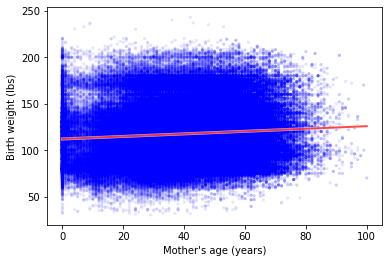

In [13]:
thinkplot.Scatter(db_popul, db_tempo, color='blue', alpha=0.1, s=10)
thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
thinkplot.Plot(fit_xs, fit_ys, color='red', linewidth=2)
thinkplot.Config(xlabel="Songs' popularity",
                 ylabel='Songs' tempo,
              #   axis=[10, 45, 0, 15],
                 legend=False)

## Residuals

The following functon computes the residuals.

In [14]:
def Residuals(xs, ys, inter, slope):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    res = ys - (inter + slope * xs)
    return res

Now we can add the residuals as a column in the DataFrame.

In [15]:
db_read['residual'] = Residuals(db_popul, db_tempo, inter, slope)

In [16]:
db_read

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,residual
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.9100,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.8140,54.963994
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.7370,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.8160,61.860335
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.1310,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.3680,-12.929983
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.3260,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.2270,59.752994
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.2250,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.3900,28.020357
5,Movie,Henri Salvador,Le petit souper aux chandelles,0Mf1jKa8eNAf1a4PwTbizj,0,0.74900,0.578,160627,0.0948,0.000000,C#,0.1070,-14.970,Major,0.1430,87.479,4/4,0.3580,-24.526006
6,Movie,Martin & les fées,"Premières recherches (par Paul Ventimila, Lori...",0NUiKYRd6jt1LKMYGkUdnZ,2,0.34400,0.703,212293,0.2700,0.000000,C#,0.1050,-12.675,Major,0.9530,82.873,4/4,0.5330,-29.407324
7,Movie,Laura Mayne,Let Me Let Go,0PbIF9YVD505GutwotpB5C,15,0.93900,0.416,240067,0.2690,0.000000,F#,0.1130,-8.949,Major,0.0286,96.827,4/4,0.2740,-17.242894
8,Movie,Chorus,Helka,0ST6uPfvaPpJLtQwhE6KfC,0,0.00104,0.734,226200,0.4810,0.000860,C,0.0765,-7.725,Major,0.0460,125.080,4/4,0.7650,13.074994
9,Movie,Le Club des Juniors,Les bisous des bisounours,0VSqZ3KStsjcfERGdcWpFO,10,0.31900,0.598,152694,0.7050,0.001250,G,0.3490,-7.790,Major,0.0281,137.496,4/4,0.7180,24.114402


To visualize the residuals, I'll split the respondents into groups by age, then plot the percentiles of the residuals versus the average age in each group.

First I'll make the groups and compute the average age in each group.

In [27]:
bins = np.arange(0, 100, 9)
indices = np.digitize(db_read.popularity, bins)
groups = db_read.groupby(indices)

popul_means = [group.popularity.mean() for _, group in groups][1:-1]
popul_means

[13.314483683504694,
 22.562079703931037,
 31.093528658796757,
 40.10012056537465,
 49.14928745220716,
 57.70314597867579,
 66.23644365274794,
 74.86719910846953,
 83.65774155995344,
 92.66129032258064]

Next I'll compute the CDF of the residuals in each group.

In [28]:
cdfs = [thinkstats2.Cdf(group.residual) for _, group in groups][1:-1]

The following function plots percentiles of the residuals against the average age in each group.

In [31]:
def PlotPercentiles(popul_means, cdfs):
    thinkplot.PrePlot(3)
    for percent in [75, 50, 25]:
        tempo_percentiles = [cdf.Percentile(percent) for cdf in cdfs]
        label = '%dth' % percent
        thinkplot.Plot(popul_means, tempo_percentiles, label=label)

The following figure shows the 25th, 50th, and 75th percentiles.

Curvature in the residuals suggests a non-linear relationship.

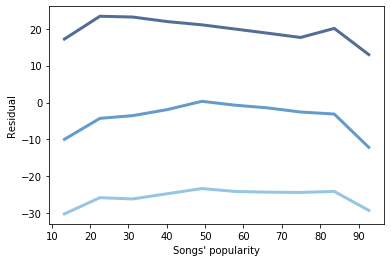

In [33]:
PlotPercentiles(popul_means, cdfs)

thinkplot.Config(xlabel="Songs' popularity",
                 ylabel='Residual')

## Sampling distribution

To estimate the sampling distribution of `inter` and `slope`, I'll use resampling.

In [34]:
def SampleRows(df, nrows, replace=False):
    """Choose a sample of rows from a DataFrame.

    df: DataFrame
    nrows: number of rows
    replace: whether to sample with replacement

    returns: DataDf
    """
    indices = np.random.choice(df.index, nrows, replace=replace)
    sample = df.loc[indices]
    return sample

def ResampleRows(df):
    """Resamples rows from a DataFrame.

    df: DataFrame

    returns: DataFrame
    """
    return SampleRows(df, len(df), replace=True)

The following function resamples the given dataframe and returns lists of estimates for `inter` and `slope`.

In [40]:
def SamplingDistributions(live, iters=101):
    t = []
    for _ in range(iters):
        sample = ResampleRows(db_read)
        popV = sample.popularity
        tempoV = sample.tempo
        estimates = LeastSquares(popV, tempoV)
        t.append(estimates)

    inters, slopes = zip(*t)
    return inters, slopes

Here's an example.

In [43]:
inters, slopes = SamplingDistributions(db_read.sample(100), iters=101)

The following function takes a list of estimates and prints the mean, standard error, and 90% confidence interval.

In [44]:
def Summarize(estimates, actual=None):
    mean = Mean(estimates)
    stderr = Std(estimates, mu=actual)
    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.ConfidenceInterval(90)
    print('mean, SE, CI', mean, stderr, ci)

Here's  the summary for `inter`.

In [46]:
Summarize(inters)

mean, SE, CI 112.004037120266 0.17684688748576033 (111.71416551344159, 112.33805170310087)


And for `slope`.

In [47]:
Summarize(slopes)

mean, SE, CI 0.13775135783744713 0.003702235742730218 (0.13146159326210152, 0.14381424539445967)


## Visualizing uncertainty

To show the uncertainty of the estimated slope and intercept, we can generate a fitted line for each resampled estimate and plot them on top of each other.

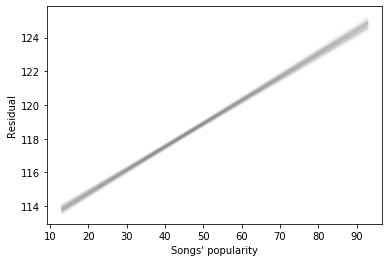

In [52]:
for slope, inter in zip(slopes, inters):
    fxs, fys = FitLine(popul_means, inter, slope)
    thinkplot.Plot(fxs, fys, color='gray', alpha=0.01)
    
thinkplot.Config(xlabel="Songs' popularity",
                 ylabel='Residual')

Or we can make a neater (and more efficient plot) by computing fitted lines and finding percentiles of the fits for each value of the dependent variable.

In [53]:
def PlotConfidenceIntervals(xs, inters, slopes, percent=90, **options):
    fys_seq = []
    for inter, slope in zip(inters, slopes):
        fxs, fys = FitLine(xs, inter, slope)
        fys_seq.append(fys)

    p = (100 - percent) / 2
    percents = p, 100 - p
    low, high = thinkstats2.PercentileRows(fys_seq, percents)
    thinkplot.FillBetween(fxs, low, high, **options)

This example shows the confidence interval for the fitted values at each mother's age.

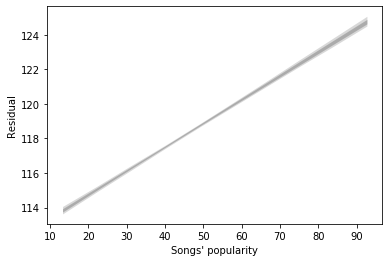

In [58]:
PlotConfidenceIntervals(popul_means, inters, slopes, percent=90, 
                        color='gray', alpha=0.3, label='90% CI')
PlotConfidenceIntervals(popul_means, inters, slopes, percent=50,
                        color='gray', alpha=0.5, label='50% CI')

thinkplot.Config(xlabel="Songs' popularity",
                 ylabel='Residual')

## Coefficient of determination



The coefficient compares the variance of the residuals to the variance of the dependent variable.

In [59]:
def CoefDetermination(ys, res):
    return 1 - Var(res) / Var(ys)

For birth weight and mother's age $R^2$ is very small, indicating that the mother's age predicts a small part of the variance in birth weight.

In [60]:
inter, slope = LeastSquares(db_popul, db_tempo)
res = Residuals(db_popul, db_tempo, inter, slope)
r2 = CoefDetermination(db_tempo, res)
r2

0.006567304662397411

We can confirm that $R^2 = \rho^2$:

In [61]:
print('rho', thinkstats2.Corr(db_popul, db_tempo))
print('R', np.sqrt(r2))    

rho 0.08103890832432391
R 0.08103890832431919


To express predictive power, I think it's useful to compare the standard deviation of the residuals to the standard deviation of the dependent variable, as a measure RMSE if you try to guess birth weight with and without taking into account mother's age.

In [62]:
print('Std(ys)', Std(db_tempo))
print('Std(res)', Std(res))

Std(ys) 30.898840191178074
Std(res) 30.797212011897585


As another example of the same idea, here's how much we can improve guesses about IQ if we know someone's SAT scores.

In [63]:
var_ys = 15**2
rho = 0.72
r2 = rho**2
var_res = (1 - r2) * var_ys
std_res = np.sqrt(var_res)
std_res

10.409610943738484

## Hypothesis testing with slopes

Here's a `HypothesisTest` that uses permutation to test whether the observed slope is statistically significant.

In [65]:
class SlopeTest(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        p, t = data
        _, slope = thinkstats2.LeastSquares(p, t)
        return slope

    def MakeModel(self):
        _, weights = self.data
        self.ybar = weights.mean()
        self.res = weights - self.ybar

    def RunModel(self):
        p, _ = self.data
        t = self.ybar + np.random.permutation(self.res)
        return p, t

And it is.

In [67]:
ht = SlopeTest((db_popul, db_tempo))
pvalue = ht.PValue()
print(pvalue)

0.0


Under the null hypothesis, the largest slope we observe after 1000 tries is substantially less than the observed value.

In [68]:
ht.actual, ht.MaxTestStat()

(0.13765920145494762, 0.010836605716867917)

We can also use resampling to estimate the sampling distribution of the slope.

In [69]:
sampling_cdf = thinkstats2.Cdf(slopes)

The distribution of slopes under the null hypothesis, and the sampling distribution of the slope under resampling, have the same shape, but one has mean at 0 and the other has mean at the observed slope.

To compute a p-value, we can count how often the estimated slope under the null hypothesis exceeds the observed slope, or how often the estimated slope under resampling falls below 0.

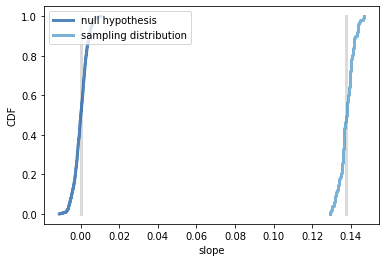

In [75]:
thinkplot.PrePlot(2)
thinkplot.Plot([0, 0], [0, 1], color='0.8')
ht.PlotCdf(label='null hypothesis')

thinkplot.Cdf(sampling_cdf, label='sampling distribution')

thinkplot.Config(xlabel='slope',
                   ylabel='CDF',
                   #xlim=[-0.03, 0.03],
                   legend=True, loc='upper left')

Here's how to get a p-value from the sampling distribution.

In [77]:
pvalue = sampling_cdf[0]
print(pvalue)

0
